In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import KFold

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

os.chdir("D:/WorkPath/PycharmProjects/MutTm-pred")
from Dataset.Process4Dataset.DatasetCeator4PonDT import Dataset4MutTm
from MachineLearning.Util import train_validation_test

In [2]:
dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\PonDB\pH-Tm\PonDB.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="PonDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="add")

train_feature = np.array(dataset.train_feature_set)
train_label = np.array(dataset.train_label_set).ravel()
test_feature = np.array(dataset.test_feature_set)
test_leabel = np.array(dataset.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为PonDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了49个UniProtID无法获取序列的数据
-删除了2989条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条379个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.494685649871826
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 9772.23it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
Time for Training: 0.3236119747161865
The Result for CV:
MAE:1.9302
PCC:0.8932
R2:0.7965
RMSE:3.4200
Time for CV:1.5840864181518555
Starting Testing...
The Result for Testing:MAE:4.5015
PCC:0.6979
R2:0.3654
RMSE:5.7689
Time for Testing:0.0019996166229248047


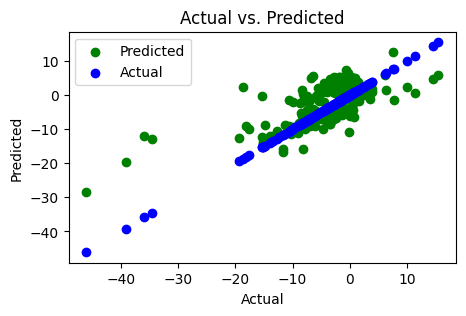

In [4]:
xgb_rfe_200 = RFE(XGBRegressor(),
                 n_features_to_select=200,
                 step=50,
                 verbose=False)
xgb_rfe_200.fit(train_feature, train_label)
train_validation_test(xgb_rfe_200,
                      xgb_rfe_200.transform(train_feature),
                      train_label,
                      xgb_rfe_200.transform(test_feature),
                      test_leabel)

### ProThermDB

In [5]:
dataset = Dataset4MutTm(package_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\Process4Dataset",
                          train_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Training.csv",
                          test_dataset_path=r"D:\WorkPath\PycharmProjects\MutTm-pred\Dataset\BasicData\ProThermDB\pH-Tm\excllent_ProThermDB_Testing.csv",
                          training_version="ProThermDB_withpHTm",
                          testing_version="ProThermDBTest_withpHTm",
                          selected_columns=["UniProt_ID", "Mutation", "pH", "Tm", "ΔTm"],
                          features=["neighbor", "aaindex", "group", "param", "rpm", "hydrop", "GO", "context_embedding"],
                          context_length=200,
                          embedding_model_path="DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D",
                          embedding_model_name="ESM-2-650M",
                          embedding_method="add")

train_feature = np.array(dataset.train_feature_set)
train_label = np.array(dataset.train_label_set).ravel()
test_feature = np.array(dataset.test_feature_set)
test_leabel = np.array(dataset.test_label_set).ravel()

当前使用设备：  NVIDIA GeForce RTX 4070 Ti SUPER
===正在从训练集版本为ProThermDB_withpHTm、训练集版本为ProThermDBTest_withpHTm的原始数据集中进行数据清洗和生物特征提取工作===
1.预处理训练集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-前一数据集采用了后一数据集中的0条数据，现已删除
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了42个UniProtID无法获取序列的数据
-删除了2004条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条91个突变位点对应错误的数据
2.预处理测试集数据...
-删除数据缺失行及非法行共计0行
-丢弃pH/Tm的缺失值
-获取[序列]信息.....该数据集已经经过处理，直接使用缓存文件
-删除了0个UniProtID无法获取序列的数据
-删除了137条非法长度的数据，当前蛋白质长度被限制在(200, 5000)
-删除条10个突变位点对应错误的数据
3.为训练集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
4.为测试集数据提取生物特征...
-获取[neighbor特征].....该数据集已经经过处理，直接使用缓存文件
-获取[aaindex特征].....该数据集已经经过处理，直接使用缓存文件
-获取[group特征].....该数据集已经经过处理，直接使用缓存文件
-获取[param]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[pssm]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[hydrop]特征.....该数据集已经经过处理，直接使用缓存文件
-获取[context_embedding]特征,该特征没有缓存文件，直接生成...


Some weights of EsmModel were not initialized from the model checkpoint at DeepLearning/EmbeddingModels/ESM-2/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


嵌入模型后显存使用量:  2.503221035003662
-释放模型后显存用量: 0.011113166809082031
5.利用GO富集分析从训练集和测试集中提取LR与PA值
-获取[GO]特征.....

100%|██████████| 213/213 [00:00<00:00, 10142.79it/s]


6.从全数据集中提取生物特征集、标签集和基本信息集...
7.数据清洗和生物特征提取工作完成==>当前显存用量:0.0079345703125


Starting Training...
Time for Training: 0.2370007038116455
The Result for CV:
MAE:1.6987
PCC:0.9146
R2:0.8358
RMSE:3.3580
Time for CV:1.231468677520752
Starting Testing...
The Result for Testing:MAE:2.8221
PCC:0.7766
R2:0.5951
RMSE:4.6083
Time for Testing:0.0019991397857666016


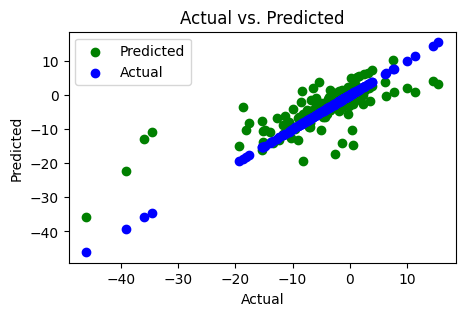

In [6]:
xgb_rfe_200 = RFE(XGBRegressor(),
                 n_features_to_select=200,
                 step=50,
                 verbose=False)
xgb_rfe_200.fit(train_feature, train_label)
train_validation_test(xgb_rfe_200,
                      xgb_rfe_200.transform(train_feature),
                      train_label,
                      xgb_rfe_200.transform(test_feature),
                      test_leabel)